In [ ]:
# Run the code cell.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# Loading the dataset.
csv_file = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/air-quality/AirQualityUCI.csv'
df = pd.read_csv(csv_file, sep=';')

# Dropping the 'Unnamed: 15' & 'Unnamed: 16' columns.
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], axis=1)

# Dropping the null values.
df = df.dropna()
print(df)
print()
# Creating a Pandas series containing 'datetime' objects.
dt_series = pd.Series(data = [item.split("/")[2] + "-" + item.split("/")[1] + "-" + item.split("/")[0] for item in df['Date']], index=df.index) + ' ' + pd.Series(data=[str(item).replace(".", ":") for item in df['Time']], index=df.index)
dt_series = pd.to_datetime(dt_series)

# Remove the Date & Time columns from the DataFrame and insert the 'dt_series' in it.
df = df.drop(columns=['Date', 'Time'], axis=1)
df.insert(loc=0, column='DateTime', value=dt_series)

# Get the Pandas series containing the year values as integers.
year_series = dt_series.dt.year

# Get the Pandas series containing the month values as integers.
month_series = dt_series.dt.month

# Get the Pandas series containing the day values as integers.
day_series = dt_series.dt.day

# Get the Pandas series containing the days of a week, i.e., Monday, Tuesday, Wednesday etc.
day_name_series = dt_series.dt.day_name()

# Add the 'Year', 'Month', 'Day' and 'Day Name' columns to the DataFrame.
df['Year'] = year_series
df['Month'] = month_series
df['Day'] = day_series
df['Day Name'] = day_name_series

# Sort the DataFrame by the 'DateTime' values in the ascending order. Also, display the first 10 rows of the DataFrame.
df = df.sort_values(by='DateTime')

# Create a function to replace the commas with periods in a Pandas series.
def comma_to_period(series):
    new_series = pd.Series(data=[float(str(item).replace(',', '.')) for item in series], index=df.index)
    return new_series

# Apply the 'comma_to_period()' function on the ''CO(GT)', 'C6H6(GT)', 'T', 'RH' and 'AH' columns.
cols_to_correct = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH'] # Create a list of column names.
for col in cols_to_correct: # Iterate through each column
    df[col] = comma_to_period(df[col]) # Replace the original column with the new series.

# Remove all the columns from the 'df' DataFrame containing more than 10% garbage value.
df = df.drop(columns=['NMHC(GT)', 'CO(GT)', 'NOx(GT)', 'NO2(GT)'], axis=1)

# Create a new DataFrame containing records for the years 2004 and 2005.
aq_2004_df = df[df['Year'] == 2004]
aq_2005_df = df[df['Year'] == 2005]

# Replace the -200 value with the median values for each column having indices between 1 and -4 (excluding -4) for the 2004 year DataFrame.
for col in aq_2004_df.columns[1:-4]:
  median = aq_2004_df.loc[aq_2004_df[col] != -200, col].median() # Get the median value for each column after excluding -200.
  aq_2004_df[col] = aq_2004_df[col].replace(to_replace=-200, value=median)

# Repeat the same exercise for the 2005 year DataFrame.
for col in aq_2005_df.columns[1:-4]:
  median = aq_2005_df.loc[aq_2005_df[col] != -200, col].median()
  aq_2005_df[col] = aq_2005_df[col].replace(to_replace=-200, value=median)

# Get the columns in the original DataFrame.
print(df.columns)
print(df.head())

            Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
0     10/03/2004  18.00.00    2,6       1360.0     150.0     11,9   
1     10/03/2004  19.00.00      2       1292.0     112.0      9,4   
2     10/03/2004  20.00.00    2,2       1402.0      88.0      9,0   
3     10/03/2004  21.00.00    2,2       1376.0      80.0      9,2   
4     10/03/2004  22.00.00    1,6       1272.0      51.0      6,5   
...          ...       ...    ...          ...       ...      ...   
9352  04/04/2005  10.00.00    3,1       1314.0    -200.0     13,5   
9353  04/04/2005  11.00.00    2,4       1163.0    -200.0     11,4   
9354  04/04/2005  12.00.00    2,4       1142.0    -200.0     12,4   
9355  04/04/2005  13.00.00    2,1       1003.0    -200.0      9,5   
9356  04/04/2005  14.00.00    2,2       1071.0    -200.0     11,9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0     

The description for all the columns containing data for air pollutants, temperature, relative humidity and absolute humidity is provided below.


|Columns|Description|
|-|-|
|PT08.S1(CO)|PT08.S1 (tin oxide) hourly averaged sensor response (nominally $\text{CO}$ targeted)|
|C6H6(GT)|True hourly averaged Benzene concentration in $\frac{\mu g}{m^3}$|
|PT08.S2(NMHC)|PT08.S2 (titania) hourly averaged sensor response (nominally $\text{NMHC}$ targeted)|
|PT08.S3(NOx)|PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally $\text{NO}_x$ targeted)|
|PT08.S4(NO2)|PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally $\text{NO}_2$ targeted)|
|PT08.S5(O3) |PT08.S5 (indium oxide) hourly averaged sensor response (nominally $\text{O}_3$ targeted)|
|T|Temperature in Â°C|
|RH|Relative Humidity (%)|
|AH|AH Absolute Humidity|

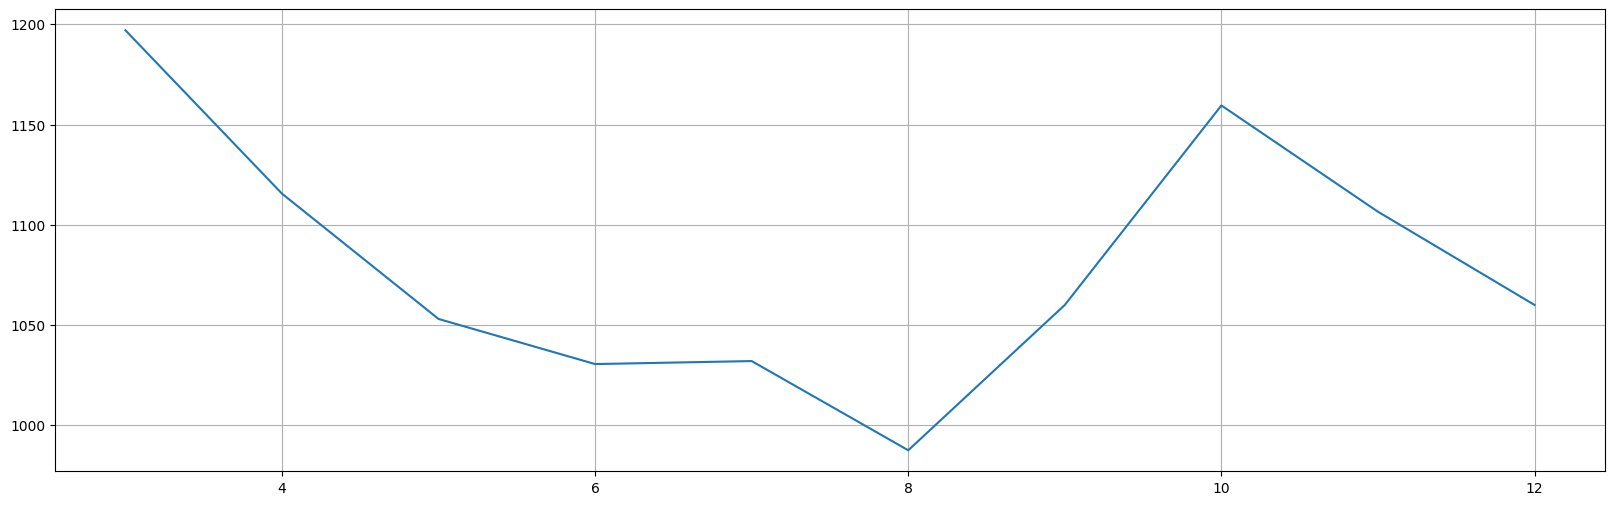

In [ ]:
# S1.1 Create a line plot for the monthly median concentration of CO in 2004.
# Group the DataFrames month-wise such that the 'Month' column is not an index.
group_2004_month=aq_2004_df.groupby(by='Month',as_index=False)
group_2005_month=aq_2005_df.groupby(by='Month',as_index=False)
plt.figure(figsize=(20,6))
plt.plot(group_2004_month.median()["Month"],group_2004_month.median()['PT08.S1(CO)'])
plt.grid()
plt.show()

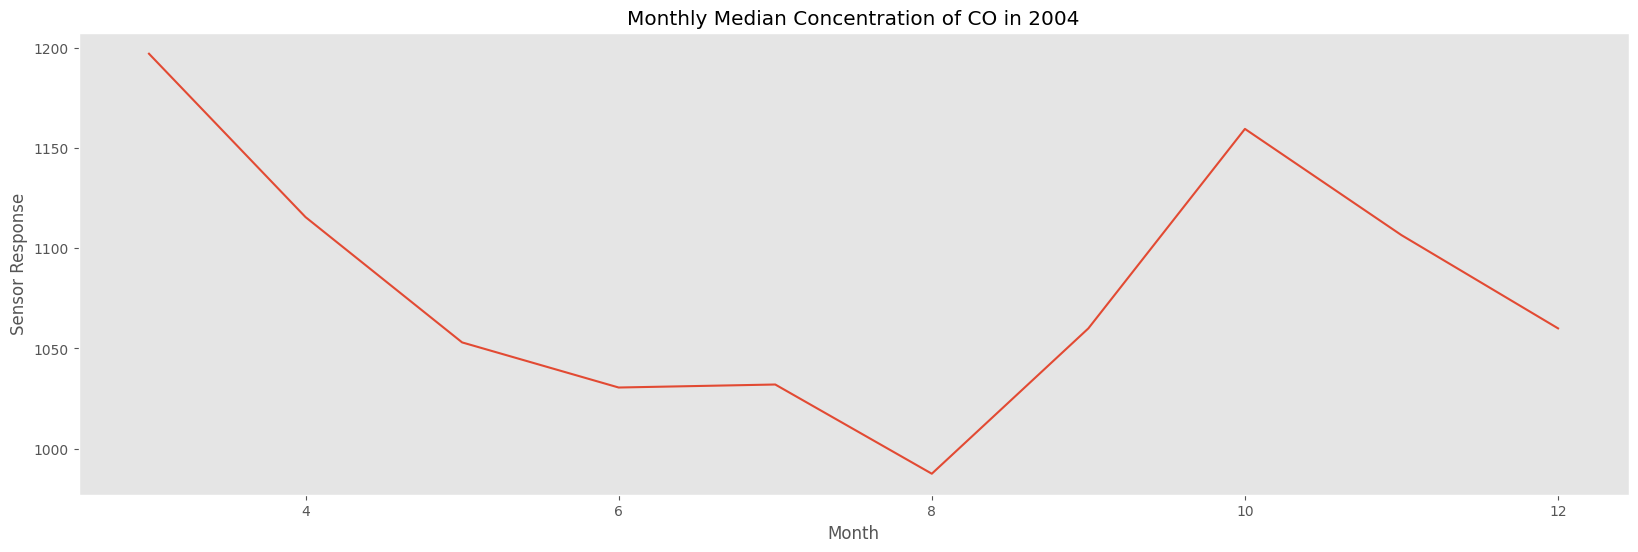

In [ ]:
# T1.1: Add the 'ggplot' style and a title in the above plot. Also, label the coordinate axes and add a grid.
plt.style.use("ggplot")
plt.figure(figsize=(20,6))
plt.title("Monthly Median Concentration of CO in 2004")
plt.plot(group_2004_month.median()["Month"],group_2004_month.median()['PT08.S1(CO)'])
plt.xlabel("Month")
plt.ylabel("Sensor Response")
plt.grid()
plt.show()

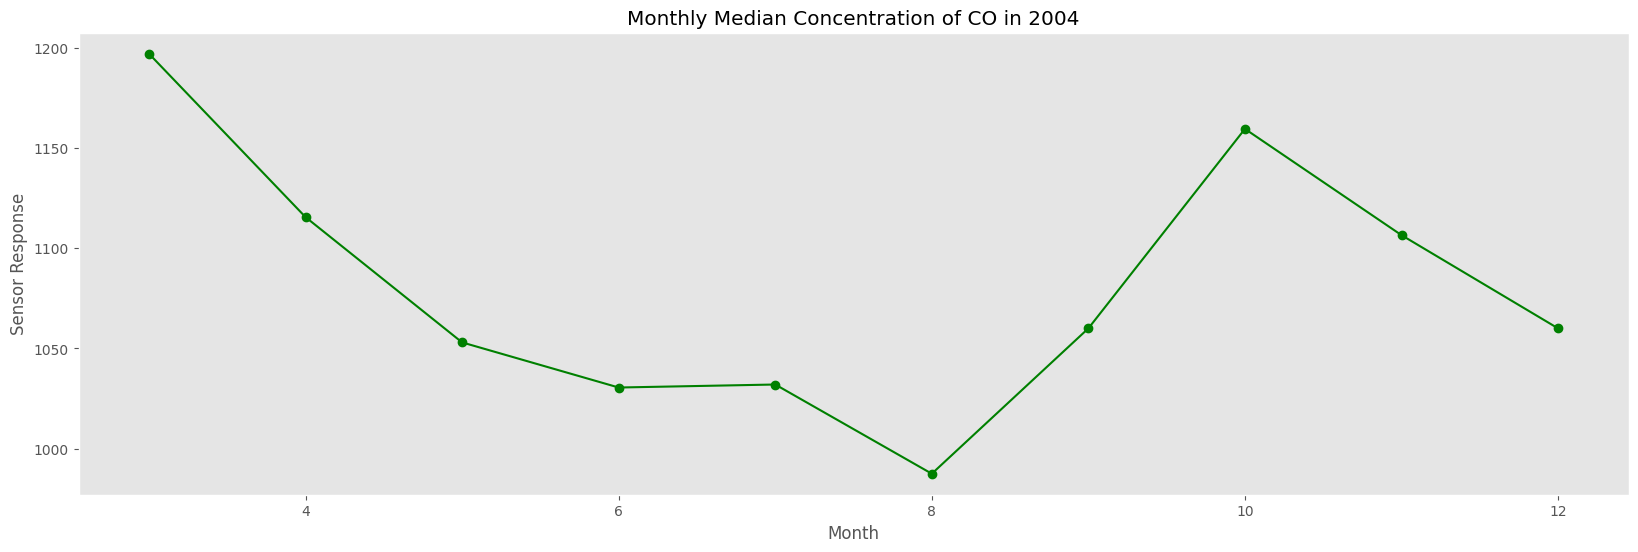

In [ ]:
# S1.2: In the above plot, pass 'g-o' as the third parameter.
plt.style.use("ggplot")
plt.figure(figsize=(20,6))
plt.title("Monthly Median Concentration of CO in 2004")
plt.plot(group_2004_month.median()["Month"],group_2004_month.median()['PT08.S1(CO)'],"g-o")
plt.xlabel("Month")
plt.ylabel("Sensor Response")
plt.grid()
plt.show()

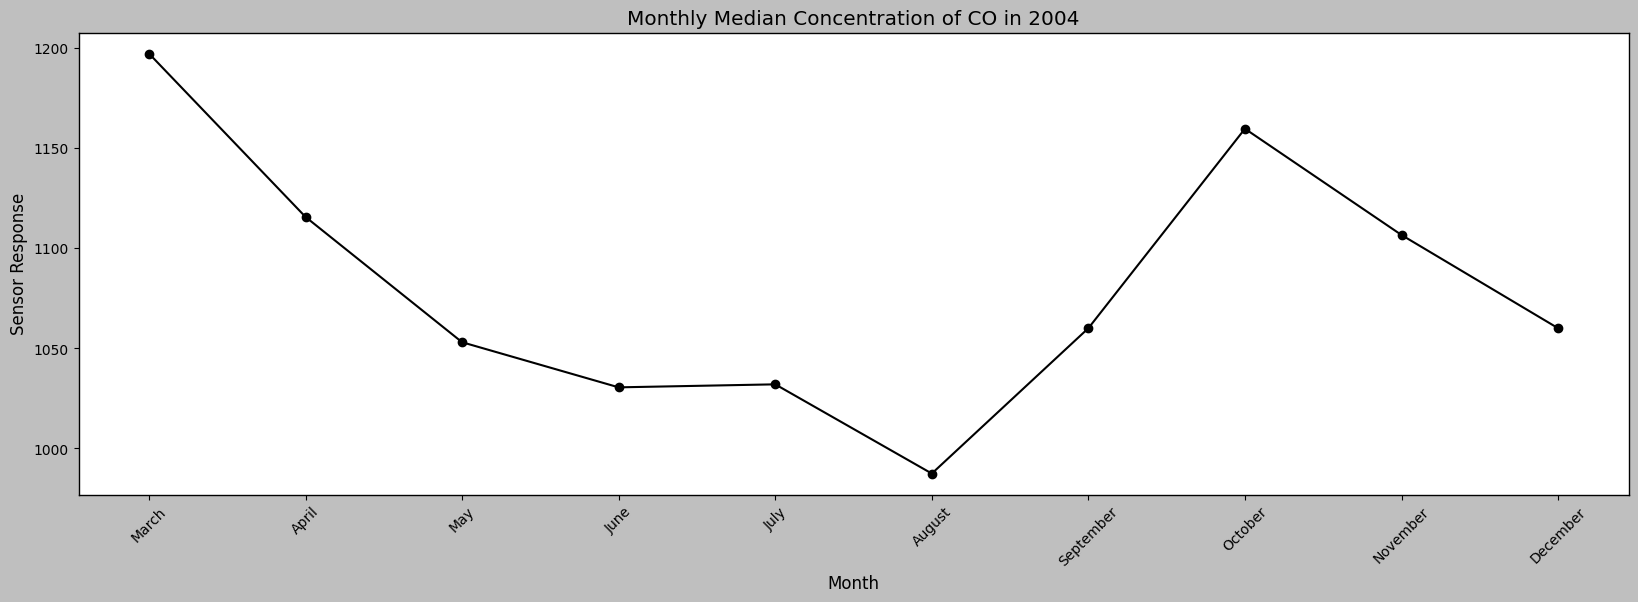

In [ ]:
# S1.3: In the above plot, replace the numeric values in the 'x-axis' with the actual month names.
# Create a list of actual month names.
months_2004 = aq_2004_df['DateTime'].dt.month_name().unique() # Extracting unique month names for the year 2004.
plt.style.use("grayscale")
plt.figure(figsize=(20,6))
plt.title("Monthly Median Concentration of CO in 2004")
plt.plot(group_2004_month.median()["Month"],group_2004_month.median()['PT08.S1(CO)'],"-o")
plt.xlabel("Month")
plt.ylabel("Sensor Response")
plt.xticks(ticks=group_2004_month.median()['Month'], labels=months_2004, rotation=45)
plt.grid(False)
plt.show()

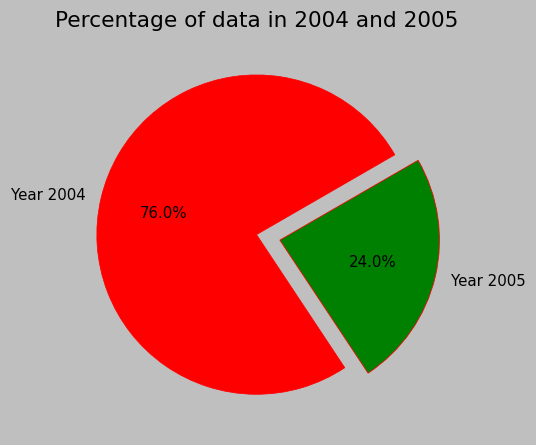

In [ ]:
# S1.1: Create a pie chart to display the percentage of data collected in 2004 and 2005.
year_slices=df['Year'].value_counts()*100/df.shape[0]
year_labels=["Year 2004","Year 2005"]
explode=[0,0.15]
plt.figure(dpi=108)
plt.title("Percentage of data in 2004 and 2005")
plt.pie(year_slices,labels=year_labels,wedgeprops={'edgecolor':'red'},autopct='%1.1f%%',colors=['red','green'],explode=explode,startangle=30)
plt.show()

#### Activity 2: Bell Curve^^^

Nature loves symmetry. How? Consider a small experiment in which you measure the heights of say 10,000 men (or women) in a city. There would be many individuals who would be equally tall. The height of most people will be equal to the mean (or average) height of all 10,000 people. Also, 50% of the population (or 5000 individuals) will have a height less than or equal to the mean height and the other 50% of the population (or 5000 individuals) will have a height greater than the mean height. So the distribution of heights will be symmetric around the mean of heights. Such a kind of distribution is called the **normal distribution**.

If you create a histogram to plot the heights of 10,000 individuals, the arrangement of the bars in the histogram will appear to form a bell shape.

Let's create a histogram to understand this concept better. First, we will have to create a `numpy` array containing 10,000 numbers denoting the heights of 10,000 individuals in a city. Let their mean height be $165 \space cm$ and the standard deviation in heights be $15 \space cm$.

In [ ]:
# T2.1 Create a NumPy array containing 10,000 random normally distributed numbers having a mean of 165 cm and a standard deviation.
height_mean=165
height_std=15
heights=np.random.normal(height_mean,height_std,size=10000)
heights

array([177.56237698, 189.05790728, 161.79944999, ..., 174.48971095,
       155.81942608, 169.3645867 ])

In [ ]:
# T2.2: Calculate the mean and standard deviation of the normally distributed heights.
print(np.mean(heights))
np.std(heights)

165.04658150445496


15.009484501314569

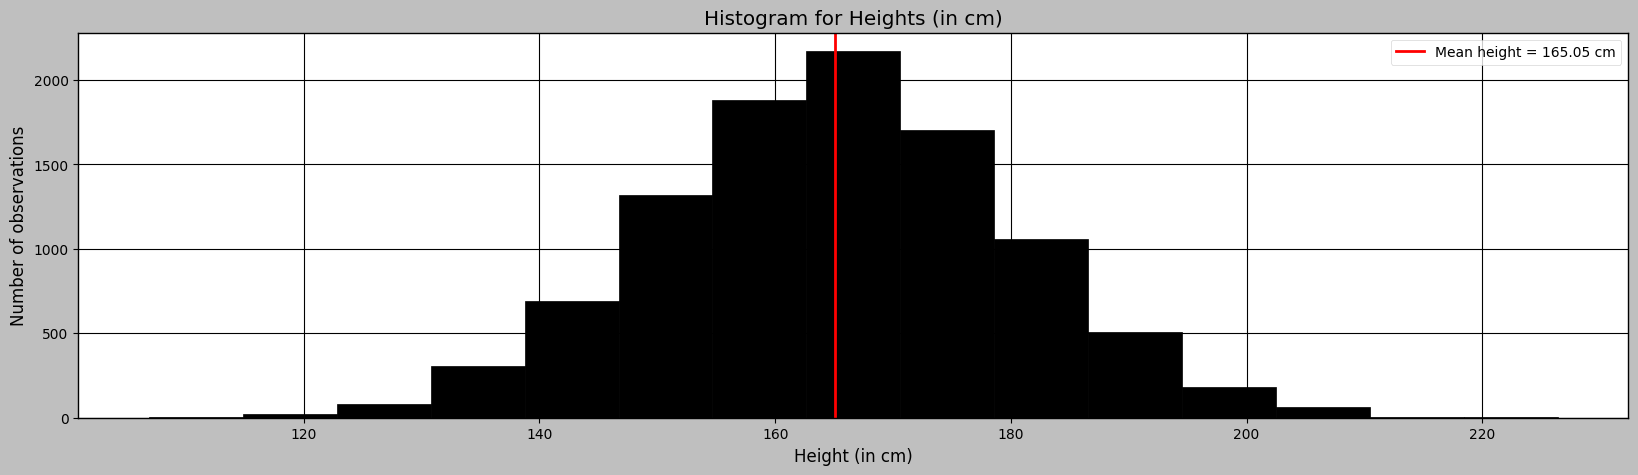

In [ ]:
# T2.3: Create a histogram for the heights.
plt.figure(figsize=(20, 5))
plt.title('Histogram for Heights (in cm)')
plt.hist(heights, bins='sturges', edgecolor='black') # 'sturges' is one of the ways to compute the number of bins in a histogram.
plt.axvline(np.mean(heights), color='red', label=f'Mean height = {np.mean(heights):.2f} cm', linewidth=2) # Creates a vertical line
plt.xlabel('Height (in cm)')
plt.ylabel("Number of observations")
plt.legend()
plt.show()

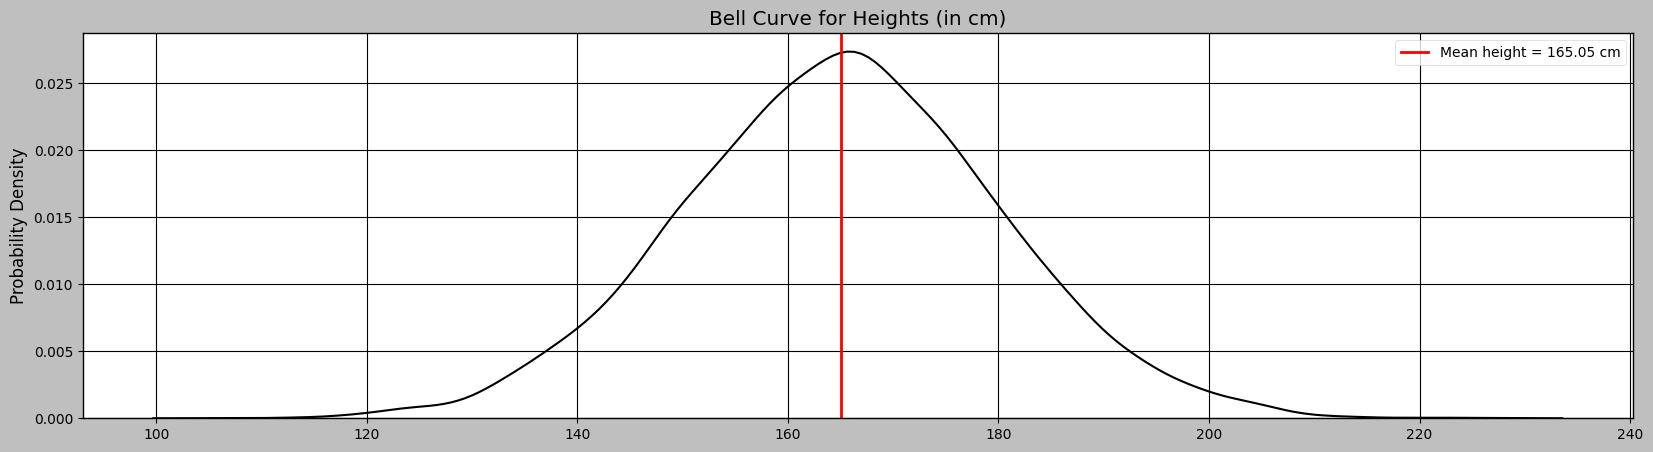

In [ ]:
# T2.4: Create a bell curve using the 'distplot()' function.
plt.figure(figsize=(20, 5))
plt.title('Bell Curve for Heights (in cm)')
sns.distplot(heights,hist=False, bins='sturges') # 'sturges' is one of the ways to compute the number of bins in a histogram.
plt.axvline(np.mean(heights), color='red', label=f'Mean height = {np.mean(heights):.2f} cm', linewidth=2) # Creates a vertical line
plt.ylabel("Probability Density")
plt.legend()
plt.show()